Saving ex1data1.txt to ex1data1.txt
Primeros 5 datos:
[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]


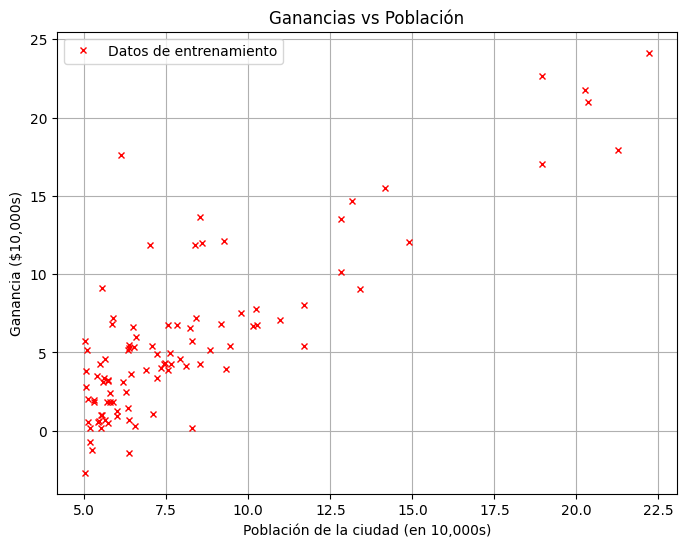

Costo inicial con theta = [0, 0]: 32.07
Theta encontrada por gradiente descendente: [-3.63029144  1.16636235]
Costo final: 4.4834
Para una población de 35,000 se predice una ganancia de $4519.77
Para una población de 70,000 se predice una ganancia de $45342.45


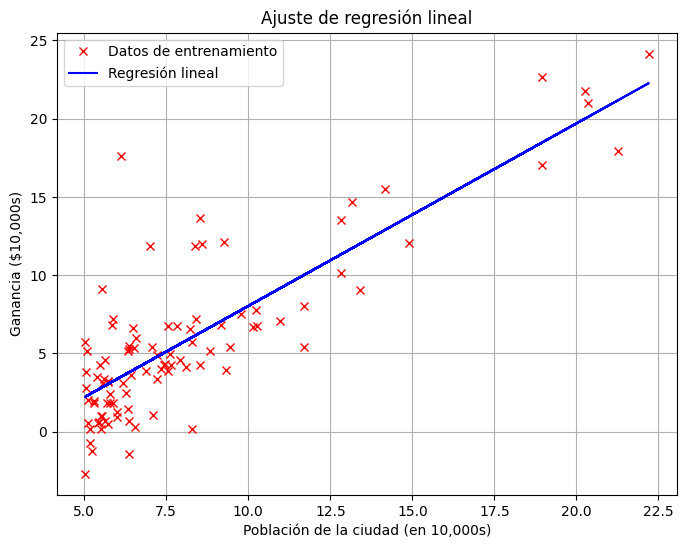

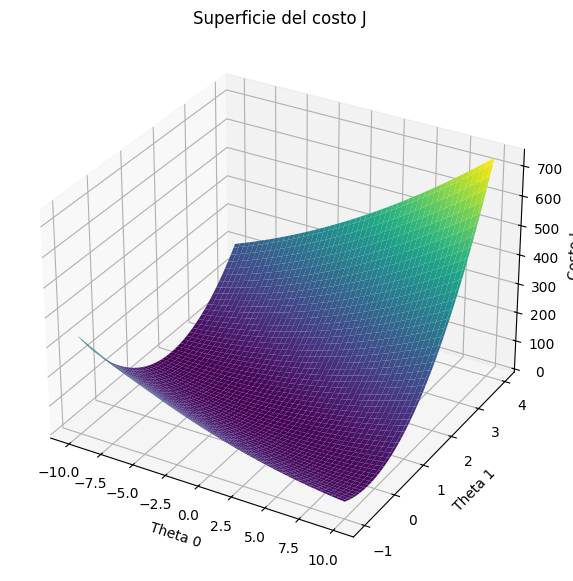

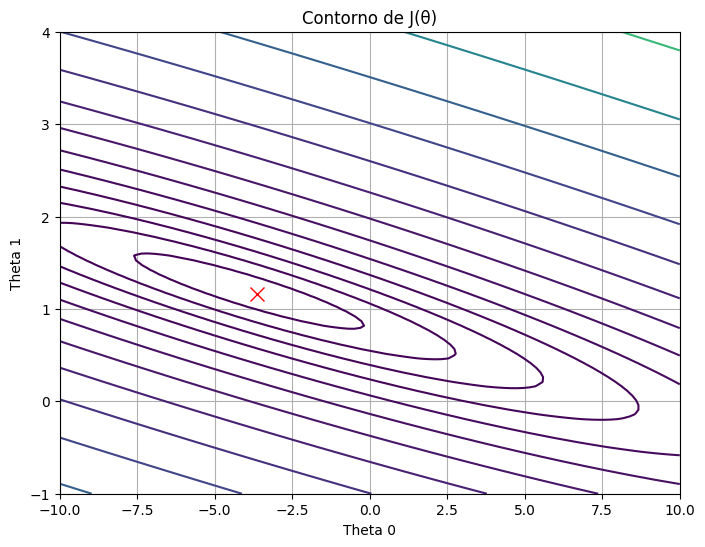

In [1]:
# -*- coding: utf-8 -*-
"""
Regresión Lineal Simple - Predicción de ganancias según la población
"""

# Subida de archivo
from google.colab import files
uploaded = files.upload()

# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
data = np.loadtxt('ex1data1.txt', delimiter=',')
X = data[:, 0]  # columna 1: población
y = data[:, 1]  # columna 2: ganancias
m = len(y)      # número de ejemplos

# Mostrar los primeros 5 datos
print("Primeros 5 datos:")
print(data[:5, :])

# ==================== Parte 1: Visualización ====================

plt.figure(figsize=(8,6))
plt.plot(X, y, 'rx', markersize=5, label='Datos de entrenamiento')  # 'rx': puntos rojos con x
plt.grid(True)
plt.xlabel('Población de la ciudad (en 10,000s)')
plt.ylabel('Ganancia ($10,000s)')
plt.title('Ganancias vs Población')
plt.legend()
plt.show()

# ==================== Parte 2: Cost Function ====================

# Agregar una columna de unos a X para el término de intersección (bias)
X_matrix = np.stack([np.ones(m), X], axis=1)  # dimensión (m, 2)
theta = np.zeros(2)  # Inicializar theta

# Función de costo J
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta  # producto matricial
    error = predictions - y
    J = (1/(2*m)) * np.dot(error, error)
    return J

# Mostrar el costo con theta inicial
J = compute_cost(X_matrix, y, theta)
print(f"Costo inicial con theta = [0, 0]: {J:.2f}")

# ==================== Parte 3: Gradiente Descendente ====================

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []

    for i in range(num_iters):
        error = X @ theta - y
        gradient = (1/m) * (X.T @ error)
        theta = theta - alpha * gradient
        J_history.append(compute_cost(X, y, theta))

    return theta, J_history

# Configuración
alpha = 0.01
iterations = 1500

# Ejecutar descenso del gradiente
theta, J_history = gradient_descent(X_matrix, y, theta, alpha, iterations)

print(f"Theta encontrada por gradiente descendente: {theta}")
print(f"Costo final: {J_history[-1]:.4f}")

# ==================== Parte 4: Predicciones ====================

# Predicción para poblaciones de 35,000 y 70,000 personas
predict1 = np.dot([1, 3.5], theta)
predict2 = np.dot([1, 7.0], theta)
print(f"Para una población de 35,000 se predice una ganancia de ${predict1 * 10000:.2f}")
print(f"Para una población de 70,000 se predice una ganancia de ${predict2 * 10000:.2f}")

# ==================== Parte 5: Visualización de regresión ====================

plt.figure(figsize=(8,6))
plt.plot(X, y, 'rx', label='Datos de entrenamiento')
plt.plot(X, X_matrix @ theta, 'b-', label='Regresión lineal')
plt.xlabel('Población de la ciudad (en 10,000s)')
plt.ylabel('Ganancia ($10,000s)')
plt.title('Ajuste de regresión lineal')
plt.legend()
plt.grid(True)
plt.show()

# ==================== Parte 6: Visualización del costo J(θ) ====================

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Calcular J para cada combinación de theta0 y theta1
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = compute_cost(X_matrix, y, t)

# Transponer J_vals para que matplotlib interprete correctamente
J_vals = J_vals.T

# Gráfico de superficie
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(T0, T1, J_vals, cmap='viridis')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Costo J')
ax.set_title('Superficie del costo J')
plt.show()

# Gráfico de contorno
plt.figure(figsize=(8,6))
plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 30))
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.title('Contorno de J(θ)')
plt.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2)  # punto mínimo
plt.grid(True)
plt.show()
